**Input Data:** There are two files in this folder, training_set and test_set.
- Training Set: Contains almost one year of historical electricity price data presented through multiple features from column B:L. The target column contains electricity prices per hour.
- Test Set: Contains all features for four days and the target value is not given.


The goal is designing two AI models, **one deep model** and **one ensemble model**, based on training data and predicting target values during the test set.
Feel free to:
1. Create new features and add it to the data set or remove existing ones from the data set.
2. Create the internal model architecture, parameters and fine-tuning process.


What you need to deliver:
1. In a word document, describe in your own words and in detail the data exploration and feature engineering steps and methods that you used.
2. In the same word document, describe in your own words and in detail the model selection, design, and fine-tuning process that you used.
3. Verify your data and submit an excel containing the forecasted values for the test data sets.
4. Submit one or more, .py/.m file(s), for each step.

In [1]:
# import libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [150]:
train_df = pd.read_excel('Training Set.xlsx')
test_df = pd.read_excel("Test Set.xlsx")

In [151]:
train_df.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75


In [4]:
train_df.shape

(7584, 13)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 7584 non-null   datetime64[ns]
 1   Hour                 7584 non-null   int64         
 2   Weekday              7584 non-null   int64         
 3   Is Working Day       7584 non-null   int64         
 4   Previous Hour Price  7584 non-null   float64       
 5   SDSH DAP             7584 non-null   float64       
 6   SDSH Volume          7584 non-null   float64       
 7   Sgn0 VolumeDir       7584 non-null   float64       
 8   P24HA Price          7584 non-null   float64       
 9   PDSH Price           7584 non-null   float64       
 10  PWSH Price           7584 non-null   float64       
 11  PWA Price            7584 non-null   float64       
 12  target               7584 non-null   float64       
dtypes: datetime64[ns](1), float64(9),

In [6]:
test_df.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN


In [7]:
test_df.shape

(96, 13)

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 96 non-null     datetime64[ns]
 1   Hour                 96 non-null     int64         
 2   Weekday              96 non-null     int64         
 3   Is Working Day       96 non-null     int64         
 4   Previous Hour Price  96 non-null     float64       
 5   SDSH DAP             96 non-null     float64       
 6   SDSH Volume          96 non-null     float64       
 7   Sgn0 VolumeDir       96 non-null     float64       
 8   P24HA Price          96 non-null     float64       
 9   PDSH Price           96 non-null     float64       
 10  PWSH Price           96 non-null     float64       
 11  PWA Price            96 non-null     float64       
 12  target               0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), int

In [9]:
train_df.describe().round(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,7584.00,7584.0,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00
mean,12.50,4.0,4.57,2429.48,2327.52,1587.82,0.02,2433.18,2426.83,2464.85,2442.33,2429.37
std,6.92,2.0,1.39,1590.72,1419.11,213.11,73.09,1125.33,1564.73,1605.18,870.87,1590.75
min,1.00,1.0,1.00,124.16,87.38,1079.80,-465.20,1145.51,124.16,124.16,1409.44,124.16
25%,6.75,2.0,4.00,1664.40,1651.85,1400.98,-50.42,1722.83,1666.84,1676.70,1813.92,1664.35
50%,12.50,4.0,5.00,1945.81,1922.32,1583.30,-16.20,2029.11,1951.46,1967.16,2060.33,1945.70
75%,18.25,6.0,5.00,2568.55,2507.29,1757.62,43.30,2725.68,2595.94,2603.57,2823.23,2568.55
max,24.00,7.0,8.00,10117.86,9548.44,2192.30,661.20,7691.48,10117.86,10117.86,5520.09,10117.86


In [10]:
test_df.describe().round(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,0.0
mean,12.50,4.75,4.00,1550.60,1549.67,1638.72,-1.76,1584.22,1520.71,1358.63,1546.61,NaN
std,6.96,2.29,1.23,260.32,241.88,209.62,77.61,83.06,367.22,512.76,41.11,NaN
min,1.00,1.00,2.00,1204.60,1225.07,1303.10,-120.40,1395.11,184.18,182.17,1458.82,NaN
25%,6.75,4.00,3.50,1357.13,1393.89,1447.88,-50.23,1515.97,1378.53,1214.70,1502.39,NaN
50%,12.50,5.50,4.50,1493.88,1509.78,1588.10,-24.15,1626.19,1483.94,1472.90,1554.20,NaN
75%,18.25,6.25,5.00,1566.80,1598.56,1822.40,19.70,1645.19,1579.28,1539.01,1584.21,NaN
max,24.00,7.00,5.00,2311.63,2372.21,2025.70,260.60,1668.11,2311.19,2957.65,1591.16,NaN


In [11]:
print('Train Dataset time period: ',train_df['Date'].max() - train_df['Date'].min())
print('Test Dataset time period : ',test_df['Date'].max() - test_df['Date'].min())

Train Dataset time period:  315 days 23:00:00
Test Dataset time period :  3 days 23:00:00


In [12]:
#let's break date to years, months
train_df['month'] = train_df['Date'].apply(lambda date:date.month)
train_df.head(5)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68,1
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40,1
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89,1
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42,1
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75,1


In [13]:
train_df.month.value_counts().reset_index().rename(
           columns={'index': 'Month', 'month': 'Count'})

,Month,Count
0,7,744
1,3,744
2,10,744
3,5,744
4,8,744
5,6,720
6,9,720
7,4,720
8,2,696
9,1,576


In [14]:
train_df.Weekday.value_counts().reset_index().rename(
           columns={'index': 'Weekday', 'Weekday': 'Count'})

,Weekday,Count
0,4,1104
1,7,1080
2,3,1080
3,6,1080
4,2,1080
5,5,1080
6,1,1080


In [15]:
train_df['Is Working Day'].value_counts().reset_index().rename(
           columns={'index': 'Is Working Day', 'Is Working Day': 'Count'})

,Is Working Day,Count
0,5,3768
1,4,1200
2,6,1008
3,2,960
4,7,216
5,1,168
6,3,144
7,8,120


In [16]:
train_df['Hour'].value_counts().reset_index().rename(
           columns={'index': 'hour', 'hour': 'Count'})

,hour,Hour
0,23,316
1,19,316
2,8,316
3,12,316
4,16,316
5,20,316
6,24,316
7,1,316
8,5,316
9,9,316


In [17]:
#let's break date to years, months
test_df['month'] = test_df['Date'].apply(lambda date:date.month)
test_df.head(5)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN,11
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN,11
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN,11
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN,11
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN,11


In [18]:
test_df.month.value_counts().reset_index().rename(
           columns={'index': 'Month', 'month': 'Count'})

,Month,Count
0,11,96


In [19]:
test_df.Weekday.value_counts().reset_index().rename(
           columns={'index': 'Weekday', 'Weekday': 'Count'})

,Weekday,Count
0,7,24
1,6,24
2,5,24
3,1,24


In [20]:
test_df['Is Working Day'].value_counts().reset_index().rename(
           columns={'index': 'Is Working Day', 'Is Working Day': 'Count'})

,Is Working Day,Count
0,5,48
1,4,24
2,2,24


In [21]:
test_df['Hour'].value_counts().reset_index().rename(
           columns={'index': 'hour', 'hour': 'Count'})

,hour,Hour
0,24,4
1,23,4
2,2,4
3,3,4
4,4,4
5,5,4
6,6,4
7,7,4
8,8,4
9,9,4


## EDA

<AxesSubplot:xlabel='month'>

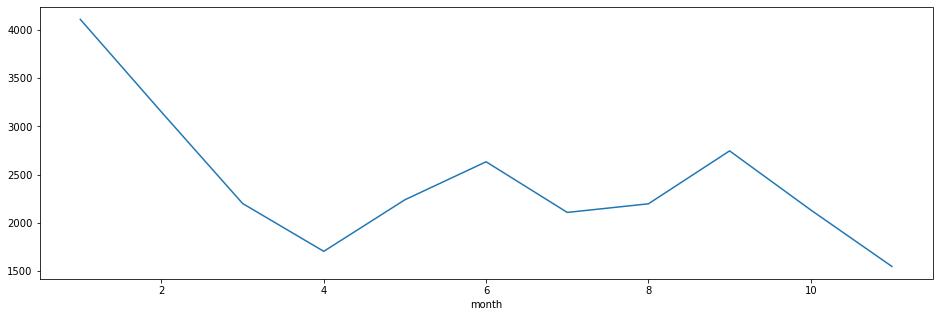

In [22]:
fig = plt.figure(figsize=(16,5))
train_df.groupby('month').mean()['target'].plot()


<AxesSubplot:xlabel='Hour'>

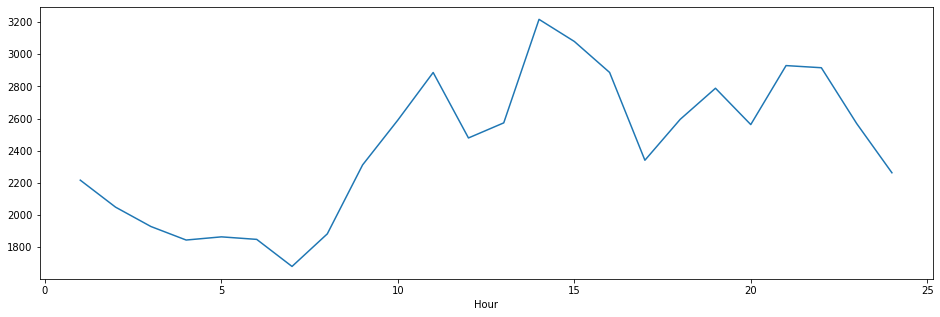

In [23]:
fig = plt.figure(figsize=(16,5))
train_df.groupby('Hour').mean()['target'].plot()

<AxesSubplot:xlabel='Weekday'>

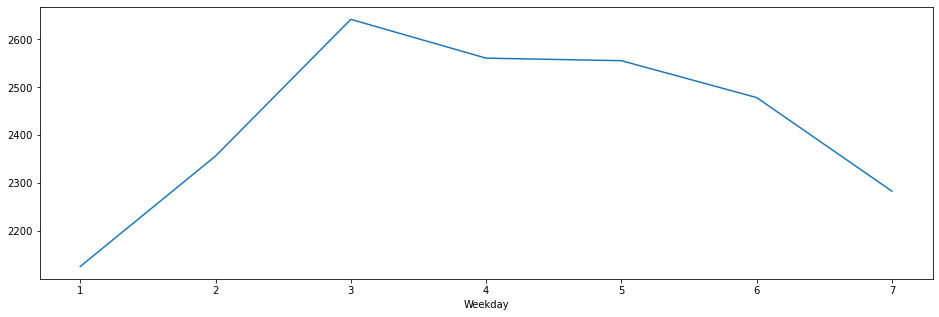

In [24]:
fig = plt.figure(figsize=(16,5))
train_df.groupby('Weekday')['target'].mean().plot()

<AxesSubplot:xlabel='Is Working Day'>

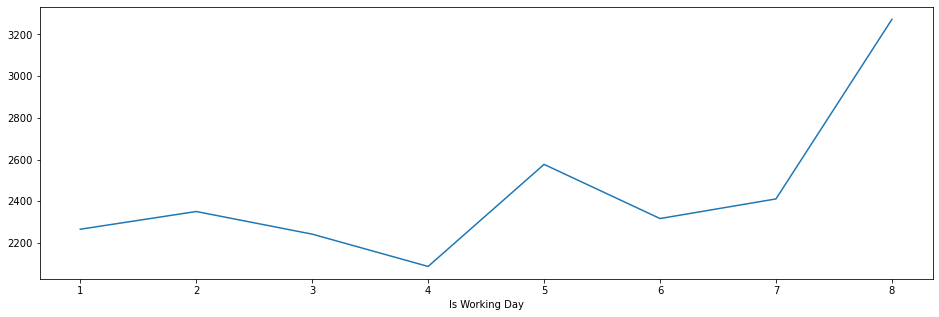

In [25]:
fig = plt.figure(figsize=(16,5))
train_df.groupby('Is Working Day').mean()['target'].plot()

#### Checking NaNs/Missing Values

In [26]:
for col in train_df.columns:
    print('Number of NaNs/Missing values in {} : '.format(col),train_df[col].isna().sum())

Number of NaNs/Missing values in Date :  0
Number of NaNs/Missing values in Hour :  0
Number of NaNs/Missing values in Weekday :  0
Number of NaNs/Missing values in Is Working Day :  0
Number of NaNs/Missing values in Previous Hour Price :  0
Number of NaNs/Missing values in SDSH DAP :  0
Number of NaNs/Missing values in SDSH Volume :  0
Number of NaNs/Missing values in Sgn0 VolumeDir :  0
Number of NaNs/Missing values in P24HA Price :  0
Number of NaNs/Missing values in PDSH Price :  0
Number of NaNs/Missing values in PWSH Price :  0
Number of NaNs/Missing values in PWA Price :  0
Number of NaNs/Missing values in target :  0
Number of NaNs/Missing values in month :  0


In [27]:
for col in test_df.columns:
    print('Number of NaNs/Missing values in {} : '.format(col),test_df[col].isna().sum())

Number of NaNs/Missing values in Date :  0
Number of NaNs/Missing values in Hour :  0
Number of NaNs/Missing values in Weekday :  0
Number of NaNs/Missing values in Is Working Day :  0
Number of NaNs/Missing values in Previous Hour Price :  0
Number of NaNs/Missing values in SDSH DAP :  0
Number of NaNs/Missing values in SDSH Volume :  0
Number of NaNs/Missing values in Sgn0 VolumeDir :  0
Number of NaNs/Missing values in P24HA Price :  0
Number of NaNs/Missing values in PDSH Price :  0
Number of NaNs/Missing values in PWSH Price :  0
Number of NaNs/Missing values in PWA Price :  0
Number of NaNs/Missing values in target :  96
Number of NaNs/Missing values in month :  0


In [28]:
# Find duplicates 
print('There are {} duplicate rows in train set based on all columns.'
      .format(train_df.duplicated(keep='first').sum()))

There are 0 duplicate rows in train set based on all columns.


In [29]:
# Find duplicates 
print('There are {} duplicate rows in train set based on all columns.'
      .format(test_df.duplicated(keep='first').sum()))

There are 0 duplicate rows in train set based on all columns.


As we can see, Train set has neither duplicate values nor NaNs and thus, we do not neet to investigate further.

## Pearson Correlation Heatmap

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

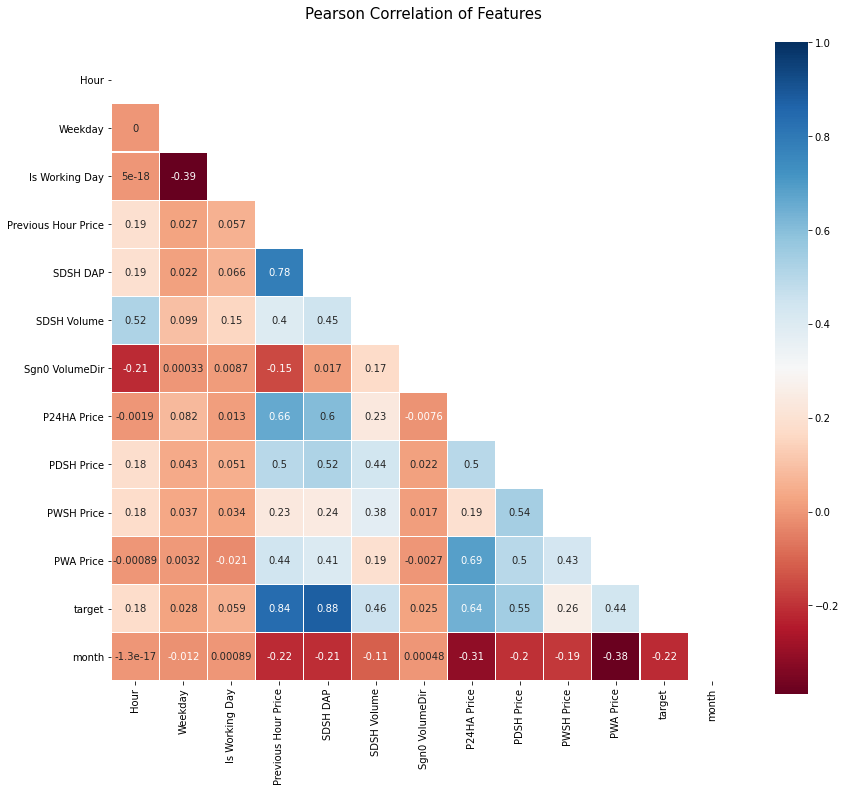

In [30]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(corr, mask=mask , linewidths=0.1 , vmax=1.0, 
            square=True , cmap=colormap, linecolor='white' , annot=True)

In [31]:
corr.style.background_gradient(cmap=colormap, axis=None).set_precision(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
Hour,1.00,0.00,0.00,0.19,0.19,0.52,-0.21,-0.00,0.18,0.18,-0.00,0.18,-0.00
Weekday,0.00,1.00,-0.39,0.03,0.02,0.10,0.00,0.08,0.04,0.04,0.00,0.03,-0.01
Is Working Day,0.00,-0.39,1.00,0.06,0.07,0.15,0.01,0.01,0.05,0.03,-0.02,0.06,0.00
Previous Hour Price,0.19,0.03,0.06,1.00,0.78,0.40,-0.15,0.66,0.50,0.23,0.44,0.84,-0.22
SDSH DAP,0.19,0.02,0.07,0.78,1.00,0.45,0.02,0.60,0.52,0.24,0.41,0.88,-0.21
SDSH Volume,0.52,0.10,0.15,0.40,0.45,1.00,0.17,0.23,0.44,0.38,0.19,0.46,-0.11
Sgn0 VolumeDir,-0.21,0.00,0.01,-0.15,0.02,0.17,1.00,-0.01,0.02,0.02,-0.00,0.03,0.00
P24HA Price,-0.00,0.08,0.01,0.66,0.60,0.23,-0.01,1.00,0.50,0.19,0.69,0.64,-0.31
PDSH Price,0.18,0.04,0.05,0.50,0.52,0.44,0.02,0.50,1.00,0.54,0.50,0.55,-0.20
PWSH Price,0.18,0.04,0.03,0.23,0.24,0.38,0.02,0.19,0.54,1.00,0.43,0.26,-0.19


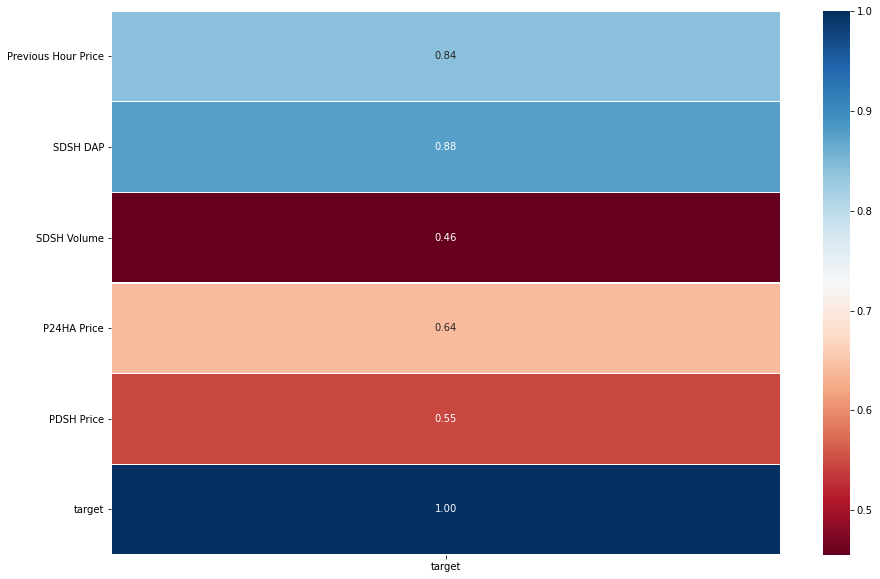

In [32]:
fig, ax = plt.subplots(figsize = (15, 10))

sns.heatmap(corr[['target']][round(corr['target'], 1) >= .5], annot=True, linewidths=.4, fmt=".2f", cmap=colormap, ax=ax);

In [33]:
train_df.corr()['target'].sort_values(ascending = False) 

target                 1.000000
SDSH DAP               0.877215
Previous Hour Price    0.842477
P24HA Price            0.640644
PDSH Price             0.545640
SDSH Volume            0.455266
PWA Price              0.435942
PWSH Price             0.261182
Hour                   0.177124
Is Working Day         0.058574
Weekday                0.028230
Sgn0 VolumeDir         0.025239
month                 -0.215488
Name: target, dtype: float64

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Family size and Parch (Parents and Children). I'll still leave both features in for the purposes of this exercise.

### Pairplots

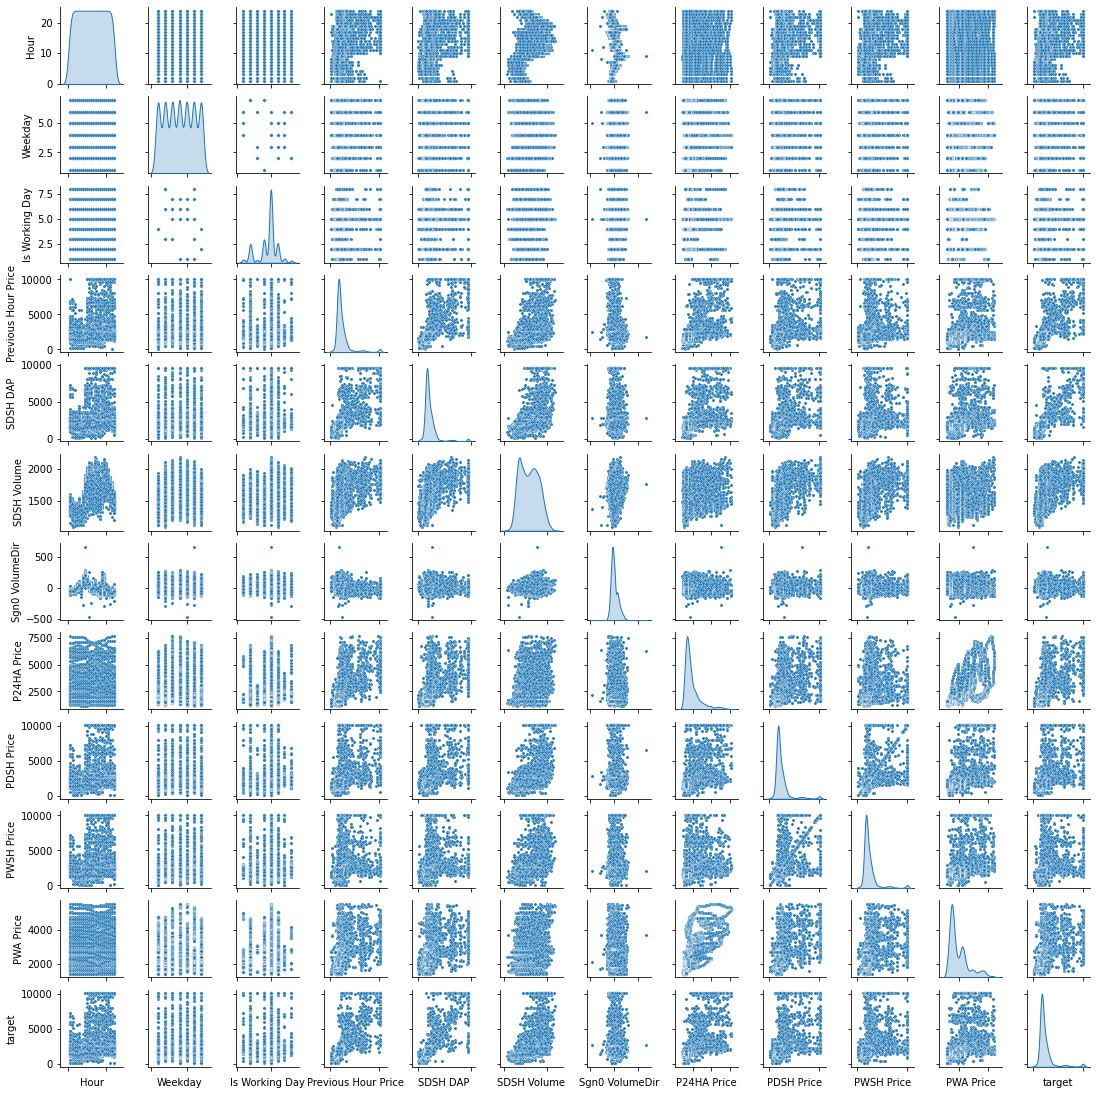

In [34]:
g = sns.pairplot(train_df[[u'Hour', u'Weekday', u'Is Working Day', u'Previous Hour Price', u'SDSH DAP', u'SDSH Volume', u'Sgn0 VolumeDir',
       u'P24HA Price', u'PDSH Price', u'PWSH Price',u'PWA Price',u'target' ]] , palette = 'seismic', size=1.3 , diag_kind = 'kde',
                 diag_kws=dict(shade=True) , plot_kws=dict(s=10) )
g.set(xticklabels=[])

<AxesSubplot:xlabel='target', ylabel='target'>

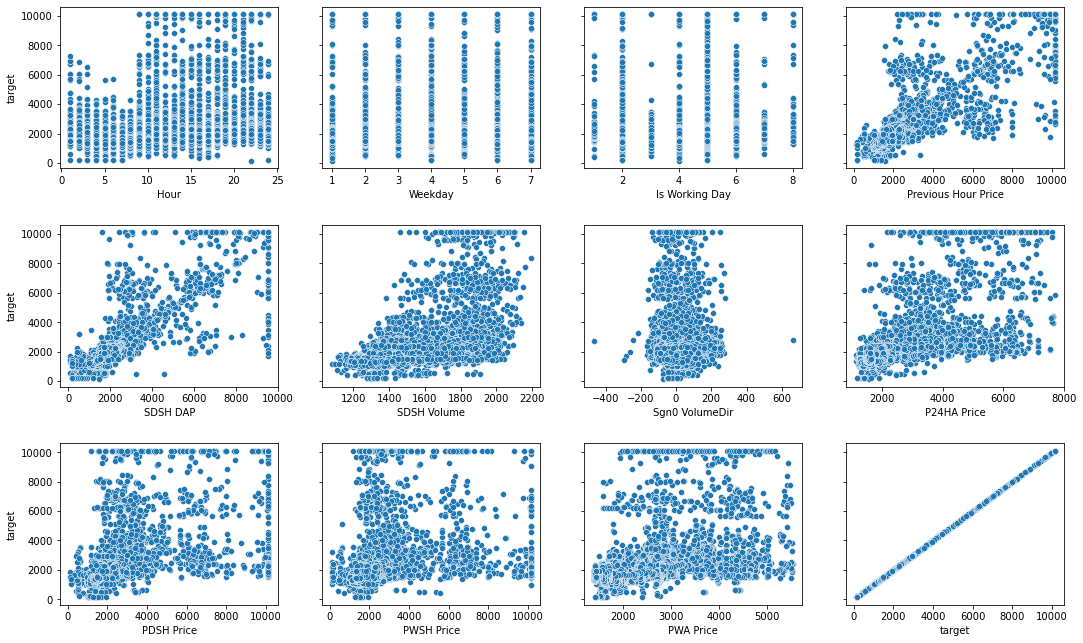

In [35]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
#sns.set(font_scale=.5)

sns.scatterplot(x=train_df.Hour, y=train_df.target, ax=ax[0, 0] )
sns.scatterplot(x=train_df.Weekday, y=train_df.target, ax=ax[0, 1])
sns.scatterplot(x=train_df['Is Working Day'], y=train_df.target, ax=ax[0, 2])
sns.scatterplot(x=train_df['Previous Hour Price'], y=train_df.target, ax=ax[0, 3])
sns.scatterplot(x=train_df['SDSH DAP'], y=train_df.target, ax=ax[1, 0])
sns.scatterplot(x=train_df['SDSH Volume'], y=train_df.target, ax=ax[1, 1])
sns.scatterplot(x=train_df['Sgn0 VolumeDir'], y=train_df.target, ax=ax[1, 2])
sns.scatterplot(x=train_df['P24HA Price'], y=train_df.target, ax=ax[1, 3])
sns.scatterplot(x=train_df['PDSH Price'], y=train_df.target, ax=ax[2, 0])
sns.scatterplot(x=train_df['PWSH Price'], y=train_df.target, ax=ax[2, 1])
sns.scatterplot(x=train_df['PWA Price'], y=train_df.target, ax=ax[2, 2])
sns.scatterplot(x=train_df['target'], y=train_df.target, ax=ax[2, 3])


## Target Variable Distribution

In [36]:
train_df.target.describe()

count     7584.000000
mean      2429.366103
std       1590.750740
min        124.160000
25%       1664.347500
50%       1945.700000
75%       2568.547500
max      10117.855409
Name: target, dtype: float64

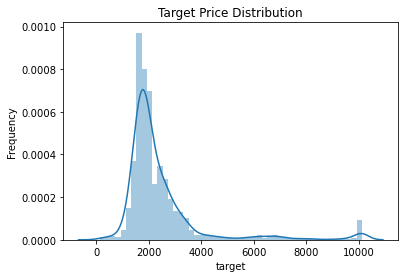

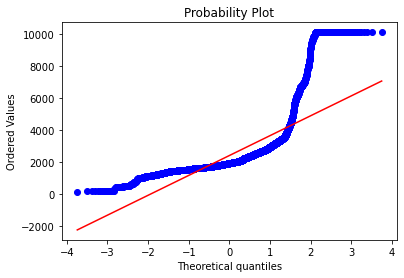

Skewness: 3.227


In [37]:
import scipy.stats as stats

sns.distplot(train_df['target'])
plt.title('Target Price Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(train_df['target'], plot=plt)
plt.show()

# For normally distributed data, the skewness should be about zero. 
print("Skewness: {:.3f}".format(train_df['target'].skew()))

Skewnewss quantifies how symmetrical the distribution is.
1. If skewness is less than -1 or greater than 1, the distribution is highly skewed.
2. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
3. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

As you can see the distribution plot and qq plot, the target variable is skewed to the right. In order to use many general linear models, we need to transform it to normal.

### Target Variable Transformation

In [38]:
# log1p calculates log(1 + input)

train_df['target'] = np.log1p(train_df['target'])

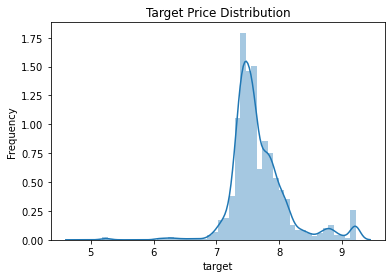

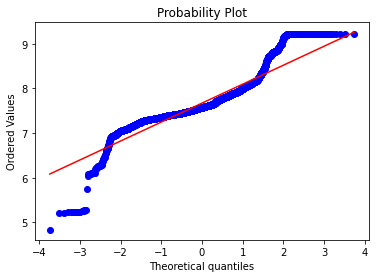

Skewness: 0.830


In [39]:
# let's check the result of the transformation

sns.distplot(train_df['target'])
plt.title('Target Price Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(train_df['target'], plot=plt)
plt.show()

print("Skewness: {:.3f}".format(train_df['target'].skew()))

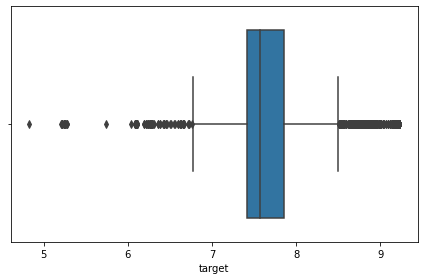

In [40]:
sns.boxplot(train_df['target'])
plt.tight_layout()

By just taking log, the shape of the distribution becomes almost normal.

As we can see the first column of the plots, it is not perfectly linear but we can say some of them are showing some positive linear pattern.

### Baseline Model — Multi-Linear Regression (MLR)

In [123]:
# Generate dummy columns (while dropping first dummy col (drop_first = True) to prevent collinearity in MLR)
train_df_lr = train_df.copy()
train_df_lr.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,7.814674,1
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,7.818189,1
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,7.819190,1
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,7.837720,1
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,7.955688,1


In [124]:
train_df_lr.drop({'Date'} ,axis = 1,  inplace = True)

In [125]:
train_df_lr.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,7.814674,1
1,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,7.818189,1
2,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,7.819190,1
3,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,7.837720,1
4,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,7.955688,1


In [126]:
# Separate dependent(target) variable and independent variables
X = train_df_lr.drop(['target'], axis = 1)
y = train_df_lr['target']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# Perform train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [129]:
# Carry out standardization on numerical columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
numerical_cols = ['Hour', 'Weekday' ,'Is Working Day' ,'Previous Hour Price','SDSH DAP','SDSH Volume', 'Sgn0 VolumeDir' , 'P24HA Price' , 'PDSH Price' , 'PWSH Price' , 'PWA Price','month']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.fit_transform(X_val[numerical_cols])

In [48]:
X_train.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
5188,-1.088201,-0.505725,0.316380,-0.609308,-0.607663,-1.161051,0.031664,-0.566620,-0.798447,-0.466779,-0.545600,0.692354
2936,-0.508916,1.487606,-1.845197,-0.569482,-0.591096,-0.406823,1.100481,-0.507839,-0.491221,-0.503807,-0.642839,-0.302713
7488,-1.667487,-1.502390,-0.404145,-0.636710,-0.574887,-0.449895,-0.837605,-1.010551,-0.550364,-0.562557,-1.151406,1.687421
6781,0.215191,0.989273,0.316380,-0.201558,0.074100,1.299673,0.786123,-0.743464,-0.410419,-0.420709,-1.024244,1.355732
4049,0.794477,-0.007392,0.316380,-0.467115,-0.578584,0.589452,-0.275860,-0.023515,-0.612367,-0.509394,-0.335373,0.028976


In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
# Instantiate a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [132]:
y_pred_val = linear_reg.predict(X_val)
y_pred_val

array([7.50250517, 8.01182509, 7.31489913, ..., 8.50353775, 9.14242338,
       8.14132958])

In [133]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})

In [134]:
result_df

,Actual,Prediction
0,7.430861,7.502505
1,8.149030,8.011825
2,7.342041,7.314899
3,9.222156,9.585902
4,8.123504,8.087423
...,...,...
1512,7.602806,7.622018
1513,7.622639,7.599180
1514,8.203345,8.503538
1515,8.295623,9.142423


In [135]:
from sklearn import metrics

# Model evaluation
print('R^2',metrics.r2_score(y_val, y_pred_val))
print('Adjusted R^2',1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1))
print('MAE',metrics.mean_absolute_error(y_val, y_pred_val))
print('MSE',metrics.mean_squared_error(y_val, y_pred_val))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))


R^2 0.7456574071542342
Adjusted R^2 0.7436280779559967
MAE 0.13301129359683747
MSE 0.053931944411989396
RMSE 0.2322325222960587


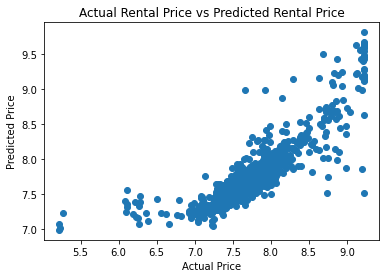

In [136]:
# Visualizing actual prices vs predicted values
plt.scatter(y_val, y_pred_val)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Rental Price vs Predicted Rental Price")
plt.show()

## Performing checks for multi-linear regression assumptions

1) Equal Error Variance (Homoscedasticity)

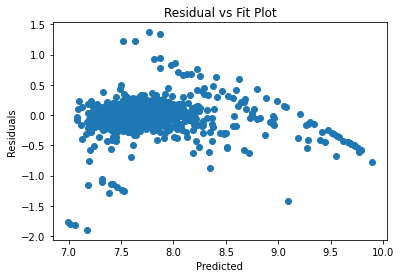

In [56]:
# Residual vs fit plot
plt.scatter(y_pred_val, y_val - y_pred_val)
plt.title("Residual vs Fit Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Homoscedasticity check shows some type of curvilinear pattern in the residual vs fit plot

2) Normal Error (Multivariate Normality)

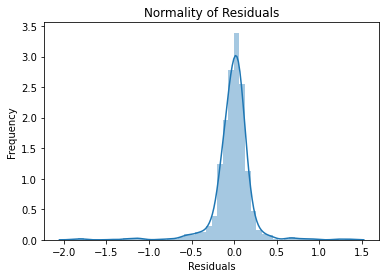

In [57]:
# Normality of residuals
sns.distplot(y_val-y_pred_val)
plt.title("Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

The residuals are normally distributed, thus the normality assumption is satisfied

3) Multi-Collinearity

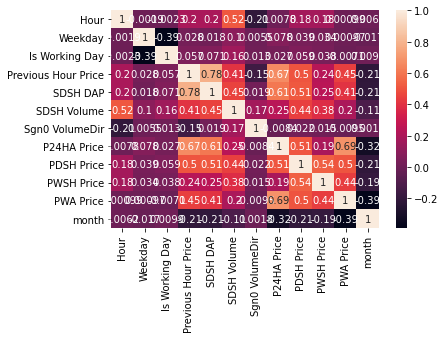

In [65]:
# Display heatmap
corrMatrix = X_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [67]:
calc_vif(X_train)

,variables,VIF
0,Hour,1.663357
1,Weekday,1.267329
2,Is Working Day,1.281747
3,Previous Hour Price,3.454965
4,SDSH DAP,2.990127
5,SDSH Volume,2.337010
6,Sgn0 VolumeDir,1.333237
7,P24HA Price,3.208308
8,PDSH Price,2.054451
9,PWSH Price,1.743785


VIF values all below 10, so we pass this check.

4) Linearity

In [68]:
cols = X.columns

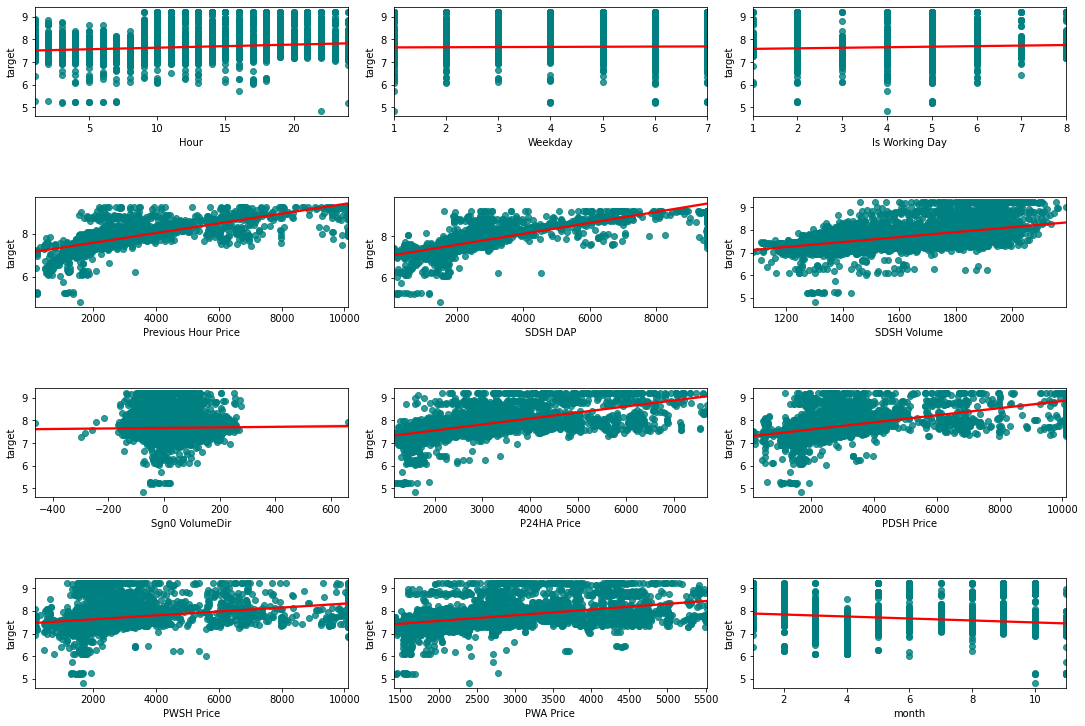

In [69]:
X_plot = X.loc[:,cols]
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

axs = axs.flatten()
for i, k in enumerate(numerical_cols):
    sns.regplot(y=y, x=X_plot[k], ax=axs[i], scatter_kws={"color": "teal"}, line_kws={"color": "red"})
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [70]:
# Display coefficients (Indicator for feature importance)
linear_reg_features = pd.DataFrame([X_train.columns, linear_reg.coef_]).T
linear_reg_features = linear_reg_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
linear_reg_features.sort_values(by='Importance Score', ascending = False)

,Feature,Importance Score
4,SDSH DAP,0.191742
3,Previous Hour Price,0.128074
5,SDSH Volume,0.0679113
7,P24HA Price,0.0669056
9,PWSH Price,0.0186752
6,Sgn0 VolumeDir,0.0127179
10,PWA Price,0.00572567
8,PDSH Price,0.00177815
2,Is Working Day,-0.000922767
0,Hour,-0.00117718


In [138]:
# Store results as dataframe
lr_dict = {'Model':'Multi-Linear Regression',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

In [139]:
linear_reg_metrics = pd.DataFrame.from_dict(lr_dict, orient = 'index').T
linear_reg_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Multi-Linear Regression,0.745657,0.743628,0.133011,0.0539319,0.232233


## On test unseen data

In [62]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [64]:
y_pred_test = linear_reg.predict(test)
y_pred_test

array([723.80303502, 726.70160149, 698.70549025, 690.27329391,
       668.6284988 , 676.77955545, 710.04488255, 725.28467302,
       801.72648648, 884.11289811, 998.7656552 , 852.31207126,
       821.29676052, 912.92815428, 944.75270005, 880.49463118,
       820.00860383, 909.61614917, 855.99680321, 762.32058913,
       753.91036848, 840.82208542, 854.19345434, 755.09683361,
       751.01737182, 720.16662844, 711.58668028, 709.41443056,
       691.53368041, 659.89709304, 671.24502338, 707.46096282,
       750.12159368, 736.94867206, 786.82396344, 808.73925149,
       782.41160245, 817.22683155, 893.06016608, 869.54196728,
       817.20002583, 887.5219757 , 865.60798954, 813.04969977,
       855.06695329, 885.2455157 , 946.28792438, 780.83603498,
       737.17693278, 723.37903123, 729.26876595, 683.28228294,
       700.48196799, 682.25101055, 687.43339653, 638.34728348,
       761.89884985, 794.90663853, 842.0841164 , 740.77771008,
       778.49886254, 769.26223026, 768.23981976, 751.68

### Modeling - Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [72]:
# Create the parameter grid for GridSearchCV
rf_param_grid = {
    'max_depth': [80, 90, 100], # Maximum number of levels in each decision tree
    'max_features': [2, 3], # Maximum number of features considered for splitting a node
    'min_samples_leaf': [1, 3, 4, 5], # Minimum number of data points allowed in a leaf node
    'n_estimators': [100, 300, 600] # Number of trees in the forest
}

In [73]:
# Instantiate a Random Forest Regressor
rf_reg = RandomForestRegressor()

In [74]:
# Setup grid search
rf_grid = GridSearchCV(estimator = rf_reg, param_grid = rf_param_grid, cv=5, n_jobs=-1, verbose=2)

In [75]:
# Fit the grid search model on training dataset
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 12.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [1, 3, 4, 5],
                         'n_estimators': [100, 300, 600]},
             verbose=2)

In [76]:
rf_grid.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'n_estimators': 600}

In [77]:
# Get best RF estimator based on best parameters
rf_best = rf_grid.best_estimator_

# Use RF regressor to predict on test set
y_pred_val = rf_best.predict(X_val)
y_pred_val

array([7.9865402 , 7.89374428, 7.44019753, ..., 7.36060791, 7.41660654,
       7.74334686])

In [78]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,8.054586,7.986540
1,7.861215,7.893744
2,7.452356,7.440198
3,8.786846,8.691191
4,7.447297,7.411251
...,...,...
1512,8.188395,8.075094
1513,7.080136,7.290115
1514,7.403293,7.360608
1515,7.446923,7.416607


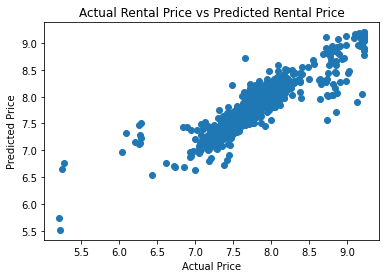

In [79]:
# Visualizing actual prices vs predicted values
plt.scatter(y_val, y_pred_val)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Rental Price vs Predicted Rental Price")
plt.show()

In [80]:
# Store results as dataframe
rf_dict = {'Model':'Random Forest Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

rf_reg_metrics = pd.DataFrame.from_dict(rf_dict, orient = 'index').T

# Display model performance metrics
rf_reg_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Random Forest Regressor,0.840025,0.838748,0.0941314,0.0314039,0.177211


In [81]:
rf_best.feature_importances_

array([0.0171561 , 0.00738322, 0.00642423, 0.24492364, 0.34447371,
       0.05521344, 0.02097905, 0.1293832 , 0.07788695, 0.02982101,
       0.04863052, 0.01772493])

In [82]:
rf_features = pd.DataFrame([X_train.columns, rf_best.feature_importances_]).T
rf_features = rf_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
rf_features.sort_values(by = 'Importance Score', ascending = False)

,Feature,Importance Score
4,SDSH DAP,0.344474
3,Previous Hour Price,0.244924
7,P24HA Price,0.129383
8,PDSH Price,0.0778869
5,SDSH Volume,0.0552134
10,PWA Price,0.0486305
9,PWSH Price,0.029821
6,Sgn0 VolumeDir,0.0209791
11,month,0.0177249
0,Hour,0.0171561


## On test unseen data

In [83]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [84]:
y_pred_test = rf_best.predict(test)
y_pred_test

array([9.00181085, 8.97162184, 8.97162184, 8.97162184, 9.0179356 ,
       9.01778004, 8.97162184, 9.01778004, 9.01778004, 9.01778004,
       9.01778004, 8.97162184, 8.97162184, 9.01778004, 8.97162184,
       8.97162184, 8.97162184, 9.01778004, 8.97162184, 8.97162184,
       8.97162184, 8.97162184, 8.97162184, 8.97162184, 9.00181085,
       8.97162184, 8.97162184, 8.97162184, 9.01778004, 9.01778004,
       9.01778004, 9.01778004, 9.01778004, 9.01778004, 9.01778004,
       8.97162184, 8.97162184, 9.01778004, 8.97162184, 8.97162184,
       8.97162184, 9.01778004, 8.97162184, 8.97162184, 8.97162184,
       8.97162184, 8.97162184, 8.97162184, 9.00335906, 8.97317005,
       8.97317005, 8.97317005, 9.00766958, 9.02232875, 8.97317005,
       9.02232875, 9.02232875, 9.02232875, 9.02232875, 8.97317005,
       8.97317005, 9.02232875, 9.02232875, 8.97317005, 8.97317005,
       9.02232875, 8.97317005, 8.97317005, 8.97317005, 8.97317005,
       8.97317005, 8.97317005, 9.00467905, 8.97395747, 8.97395

### Modeling - XGBoost Regressor

In [85]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
from catboost import Pool, CatBoostRegressor

In [86]:
xgb_param_grid = {"learning_rate": [0.05, 0.1, 0.2], # Step size shrinkage used in update to prevents overfitting.
                  "max_depth"        : [6, 8, 9, 10], # Maximum depth of a tree. 
                  "min_child_weight" : [1, 3, 5, 7], # Minimum number of instances required in a child node
                  "gamma"            : [0.0, 0.1, 0.2, 0.3], # Minimum loss reduction required to make a further partition on a leaf node of the tree.
                  "colsample_bytree" : [0.3, 0.4, 0.6, 0.8] # Number of features supplied to a tree
}

xgb_reg = xgb.XGBRegressor(seed = 42, objective ='reg:squarederror')

xgb_reg_grid = GridSearchCV(estimator = xgb_reg, param_grid = xgb_param_grid, cv=5, n_jobs=-1, verbose=2)

In [87]:
xgb_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 71.6min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=None, tree_method=None,
      

In [88]:
xgb_reg_grid.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 1}

In [90]:
# Get best model (based on best parameters) and predict on test set
best_xgb_reg = xgb_reg_grid.best_estimator_
y_pred_val = best_xgb_reg.predict(X_val)

In [91]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,8.054586,8.053491
1,7.861215,7.916484
2,7.452356,7.473973
3,8.786846,8.649134
4,7.447297,7.405975
...,...,...
1512,8.188395,8.050753
1513,7.080136,7.261917
1514,7.403293,7.372022
1515,7.446923,7.440227


In [104]:
# Store results as dataframe
xgb_dict = {'Model':'XGBoost Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

# Display model performance metrics
xgb_metrics = pd.DataFrame.from_dict(xgb_dict, orient = 'index').T
xgb_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,XGBoost Regressor,0.83834,0.83705,0.0967197,0.0317346,0.178142


In [95]:
xgb_features = pd.DataFrame([X_train.columns, best_xgb_reg.feature_importances_]).T
xgb_features = xgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
xgb_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
4,SDSH DAP,0.404634
3,Previous Hour Price,0.206656
7,P24HA Price,0.0711643
5,SDSH Volume,0.0686546
8,PDSH Price,0.0638493
9,PWSH Price,0.053659
11,month,0.0350491
10,PWA Price,0.0332588
6,Sgn0 VolumeDir,0.017963
1,Weekday,0.015956


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

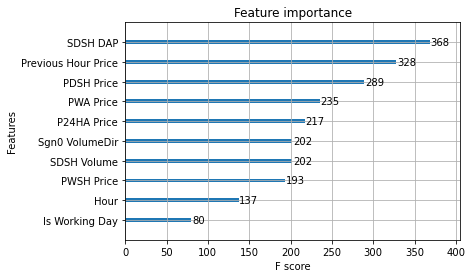

In [96]:
plot_importance(best_xgb_reg, max_num_features = 10)

In [97]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [98]:
y_pred_test = best_xgb_reg.predict(test)
y_pred_test

array([8.833081, 8.844585, 8.844585, 8.844585, 9.114073, 9.224052,
       8.844585, 9.224052, 9.224052, 9.224052, 9.224052, 8.844585,
       8.844585, 9.224052, 8.844585, 8.844585, 8.844585, 9.224052,
       8.844585, 8.844585, 8.844585, 8.844585, 8.844585, 8.844585,
       8.833081, 8.844585, 8.844585, 8.844585, 9.224052, 9.224052,
       9.224052, 9.224052, 9.224052, 9.224052, 9.224052, 8.844585,
       8.844585, 9.224052, 8.844585, 8.844585, 8.844585, 9.224052,
       8.844585, 8.844585, 8.844585, 8.844585, 8.844585, 8.844585,
       8.833081, 8.844585, 8.844585, 8.844585, 9.093921, 9.224052,
       8.844585, 9.224052, 9.224052, 9.224052, 9.224052, 8.844585,
       8.844585, 9.224052, 9.224052, 8.844585, 8.844585, 9.224052,
       8.844585, 8.844585, 8.844585, 8.844585, 8.844585, 8.844585,
       8.833081, 8.844585, 8.844585, 8.844585, 9.106429, 8.844585,
       8.844585, 9.224052, 9.224052, 9.224052, 9.224052, 8.844585,
       9.224052, 8.844585, 9.088236, 8.844585, 9.224052, 9.224

 ###  Modeling - LightGBM Regressor

In [99]:
gbm_param_grid = {'metric': ['rmse'],
                  'max_depth': [9,10,11,12,13], 
                  'bagging_fraction': [0.8, 0.9, 1],
                  'feature_fraction': [0.8, 0.9, 1],
                  'min_data_in_leaf': [20,50,80],
                  'learning_rate': [0.01,0.05,0.1,0.2]}

light_gbm_reg = lgb.LGBMRegressor(seed = 42, num_iterations = 1200)

light_gbm_grid = GridSearchCV(estimator = light_gbm_reg, param_grid = gbm_param_grid, cv=5, n_jobs=-1, verbose=1) 

light_gbm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 81.3min finished


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


GridSearchCV(cv=5, estimator=LGBMRegressor(num_iterations=1200, seed=42),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.8, 0.9, 1],
                         'feature_fraction': [0.8, 0.9, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [9, 10, 11, 12, 13], 'metric': ['rmse'],
                         'min_data_in_leaf': [20, 50, 80]},
             verbose=1)

In [100]:
light_gbm_grid.best_params_

{'bagging_fraction': 0.8,
 'feature_fraction': 0.9,
 'learning_rate': 0.01,
 'max_depth': 13,
 'metric': 'rmse',
 'min_data_in_leaf': 20}

In [101]:
best_light_gbm = light_gbm_grid.best_estimator_
y_pred_val = best_light_gbm.predict(X_val)

In [102]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,8.054586,8.043584
1,7.861215,7.905935
2,7.452356,7.483816
3,8.786846,8.803470
4,7.447297,7.380319
...,...,...
1512,8.188395,7.997318
1513,7.080136,7.235103
1514,7.403293,7.378075
1515,7.446923,7.432586


In [103]:
# Store results as dataframe
lgbm_dict = {'Model':'LightGBM Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

lgbm_metrics = pd.DataFrame.from_dict(lgbm_dict, orient = 'index').T

# Show model performance metrics
lgbm_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,LightGBM Regressor,0.83834,0.83705,0.0967197,0.0317346,0.178142


In [105]:
lgb_features = pd.DataFrame([X_train.columns, best_light_gbm.feature_importances_]).T
lgb_features = lgb_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
lgb_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
4,SDSH DAP,6074
3,Previous Hour Price,5608
6,Sgn0 VolumeDir,3721
5,SDSH Volume,3464
7,P24HA Price,3245
10,PWA Price,3200
8,PDSH Price,2914
9,PWSH Price,2820
0,Hour,2038
11,month,1398


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

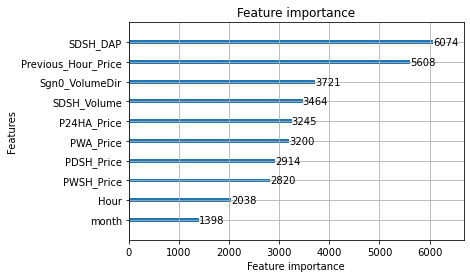

In [106]:
lgb.plot_importance(best_light_gbm, max_num_features = 10)

In [107]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [110]:
y_pred_test = best_light_gbm.predict(test)
y_pred_test

array([9.10598164, 9.15802856, 9.15802856, 9.15802856, 9.28419021,
       9.34710702, 9.15802856, 9.34710702, 9.34710702, 9.34710702,
       9.34710702, 9.15802856, 9.15802856, 9.34710702, 9.15802856,
       9.15802856, 9.15802856, 9.34710702, 9.15802856, 9.15802856,
       9.15802856, 9.15802856, 9.15802856, 9.15802856, 9.10598164,
       9.15802856, 9.15802856, 9.15802856, 9.34710702, 9.34710702,
       9.34710702, 9.34710702, 9.34710702, 9.34710702, 9.34710702,
       9.15802856, 9.15802856, 9.34710702, 9.15802856, 9.15802856,
       9.15802856, 9.34710702, 9.15802856, 9.15802856, 9.15802856,
       9.15802856, 9.15802856, 9.15802856, 9.09903778, 9.15215537,
       9.15215537, 9.15215537, 9.15744634, 9.34777127, 9.15215537,
       9.34777127, 9.34777127, 9.34777127, 9.34777127, 9.15215537,
       9.15215537, 9.34777127, 9.34777127, 9.15215537, 9.15215537,
       9.34777127, 9.15215537, 9.15215537, 9.15215537, 9.15215537,
       9.15215537, 9.15215537, 9.10721579, 9.15975943, 9.15975

### Modeling - CatBoost Regressor

In [111]:
# initialize Pool
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_val)

In [112]:
catboost_param_grid = {'learning_rate': [0.03, 0.1, 0.15],
                        'depth': [4,6,8,9,10,11],
                        'l2_leaf_reg': [1, 3, 5]}

In [113]:
# Initiate CatBoost regressor instance
catboost_reg = CatBoostRegressor(random_seed = 42, iterations=100, loss_function='RMSE')

catboost_reg_grid = GridSearchCV(estimator = catboost_reg, param_grid = catboost_param_grid, cv=5, n_jobs=-1, verbose=2) 

catboost_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 11.9min finished


0:	learn: 0.4272678	total: 185ms	remaining: 18.3s
1:	learn: 0.3984294	total: 224ms	remaining: 11s
2:	learn: 0.3717369	total: 245ms	remaining: 7.93s
3:	learn: 0.3482597	total: 265ms	remaining: 6.37s
4:	learn: 0.3274107	total: 288ms	remaining: 5.47s
5:	learn: 0.3091757	total: 309ms	remaining: 4.85s
6:	learn: 0.2918044	total: 332ms	remaining: 4.41s
7:	learn: 0.2768498	total: 359ms	remaining: 4.13s
8:	learn: 0.2637720	total: 393ms	remaining: 3.97s
9:	learn: 0.2531835	total: 415ms	remaining: 3.74s
10:	learn: 0.2431504	total: 436ms	remaining: 3.53s
11:	learn: 0.2344528	total: 459ms	remaining: 3.37s
12:	learn: 0.2260591	total: 482ms	remaining: 3.22s
13:	learn: 0.2184690	total: 504ms	remaining: 3.1s
14:	learn: 0.2119758	total: 524ms	remaining: 2.97s
15:	learn: 0.2059575	total: 544ms	remaining: 2.86s
16:	learn: 0.2005165	total: 568ms	remaining: 2.77s
17:	learn: 0.1958662	total: 588ms	remaining: 2.68s
18:	learn: 0.1925678	total: 611ms	remaining: 2.6s
19:	learn: 0.1892650	total: 632ms	remaining: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000025FE785B5B0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 9, 10, 11],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1, 0.15]},
             verbose=2)

In [114]:
catboost_reg_grid.best_params_

{'depth': 9, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [116]:
best_catboost_reg = catboost_reg_grid.best_estimator_

# Make prediction
y_pred_val = best_catboost_reg.predict(X_val)

In [117]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val})
result_df

,Actual,Prediction
0,8.054586,8.032666
1,7.861215,7.889474
2,7.452356,7.442010
3,8.786846,8.728922
4,7.447297,7.393905
...,...,...
1512,8.188395,8.065846
1513,7.080136,7.284948
1514,7.403293,7.378233
1515,7.446923,7.419827


In [118]:
# Store results as dataframe
catboost_dict = {'Model':'CatBoost Regressor',
          'R^2':metrics.r2_score(y_val, y_pred_val),
          'Adjusted R^2':(1 - (1-metrics.r2_score(y_val, y_pred_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)),
          'MAE':metrics.mean_absolute_error(y_val, y_pred_val),
          'MSE':metrics.mean_squared_error(y_val, y_pred_val),
          'RMSE':np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))}

catboost_metrics = pd.DataFrame.from_dict(catboost_dict, orient = 'index').T
catboost_metrics

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,CatBoost Regressor,0.835099,0.833784,0.0965026,0.0323708,0.179919


In [119]:
catboost_features = pd.DataFrame([X_train.columns, best_catboost_reg.feature_importances_]).T
catboost_features = catboost_features.rename(columns={0: 'Feature', 1: 'Importance Score'})
catboost_features.sort_values(by = 'Importance Score', ascending = False).head(15)

,Feature,Importance Score
4,SDSH DAP,45.4446
3,Previous Hour Price,25.9896
6,Sgn0 VolumeDir,4.63014
7,P24HA Price,3.64278
11,month,3.5509
5,SDSH Volume,3.28353
10,PWA Price,3.02229
8,PDSH Price,2.83874
9,PWSH Price,2.63788
0,Hour,2.09344


In [120]:
test=test_df.copy()
test = test.drop({'Date','target'},axis=1)
test.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,month
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,11
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,11
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,11
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,11
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,11


In [121]:
y_pred_test = best_catboost_reg.predict(test)
y_pred_test

array([8.86599002, 8.86635113, 8.86635113, 8.86635113, 8.95672974,
       8.96025248, 8.86635113, 8.96025248, 8.96025248, 8.96025248,
       8.96025248, 8.86635113, 8.86635113, 8.96025248, 8.86635113,
       8.86635113, 8.86635113, 8.96025248, 8.86635113, 8.86635113,
       8.86635113, 8.86635113, 8.86635113, 8.86635113, 8.86599002,
       8.86635113, 8.86635113, 8.86635113, 8.96025248, 8.96025248,
       8.96025248, 8.96025248, 8.96025248, 8.96025248, 8.96025248,
       8.86635113, 8.86635113, 8.96025248, 8.86635113, 8.86635113,
       8.86635113, 8.96025248, 8.86635113, 8.86635113, 8.86635113,
       8.86635113, 8.86635113, 8.86635113, 8.8555032 , 8.87846983,
       8.87846983, 8.87846983, 8.88946113, 8.97555969, 8.87846983,
       8.97555969, 8.97555969, 8.97555969, 8.97555969, 8.87846983,
       8.87846983, 8.97555969, 8.97555969, 8.87846983, 8.87846983,
       8.97555969, 8.87846983, 8.87846983, 8.87846983, 8.87846983,
       8.87846983, 8.87846983, 8.91371473, 8.91407585, 8.91407

### Compare Models

In [140]:
df_metrics = pd.concat([linear_reg_metrics, rf_reg_metrics, xgb_metrics, lgbm_metrics, catboost_metrics])
df_metrics.sort_values(by = 'RMSE', ascending = True)

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Random Forest Regressor,0.840025,0.838748,0.0941314,0.0314039,0.177211
0,XGBoost Regressor,0.83834,0.83705,0.0967197,0.0317346,0.178142
0,LightGBM Regressor,0.83834,0.83705,0.0967197,0.0317346,0.178142
0,CatBoost Regressor,0.835099,0.833784,0.0965026,0.0323708,0.179919
0,Multi-Linear Regression,0.745657,0.743628,0.133011,0.0539319,0.232233


In [141]:
# Omitting CatBoost result
df_metrics = pd.concat([linear_reg_metrics, rf_reg_metrics, xgb_metrics, lgbm_metrics])
df_metrics.sort_values(by = 'RMSE', ascending = True)

,Model,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Random Forest Regressor,0.840025,0.838748,0.0941314,0.0314039,0.177211
0,XGBoost Regressor,0.83834,0.83705,0.0967197,0.0317346,0.178142
0,LightGBM Regressor,0.83834,0.83705,0.0967197,0.0317346,0.178142
0,Multi-Linear Regression,0.745657,0.743628,0.133011,0.0539319,0.232233


### Test with Liner Regression

In [142]:
#Liner Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([-0.00058866, -0.00625205, -0.00065053,  0.12473271,  0.19335186,
        0.06636586,  0.01204922,  0.0664518 ,  0.00094779,  0.01397532,
        0.00912038, -0.03019655])

In [143]:
y_predd = regressor.predict(X_val)
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
3007,7.430861,7.502505
742,8.149030,8.011825
6101,7.342041,7.314899
3349,9.222156,9.585902
952,8.123504,8.087423
3872,7.606686,7.619225
2353,7.516765,7.416103
6382,7.420741,7.410487
7159,6.929791,7.227045
6443,7.447215,7.552413


<AxesSubplot:xlabel='target', ylabel='Density'>

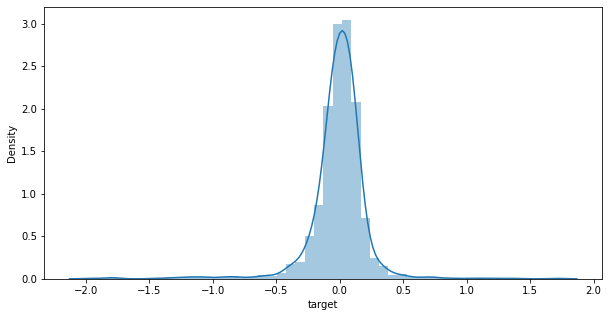

In [145]:
fig = plt.figure(figsize=(10,5))
residuals = (y_val- y_predd)
sns.distplot(residuals)

In [146]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_val, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_val, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_val,y_predd)))

Mean Absolute Error: 0.13
Mean Squared Error:0.05
Root Mean Squared Error:0.23
Variance score is: 0.75


In [141]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(y_val, y_val)))

Linear Regression Model:
Train Score 0.77
Test Score 0.75


In [147]:
y_pred_test = regressor.predict(test)
y_pred_test

array([719.00588498, 720.17166576, 692.05520625, 683.50471234,
       662.29608427, 670.36880954, 703.66454616, 718.35696481,
       794.90740903, 876.00218   , 989.82744017, 842.11545039,
       812.46736174, 903.22358546, 932.15310328, 868.79556242,
       807.77875998, 897.41895796, 841.10708808, 750.80122194,
       744.30102059, 832.08421701, 843.82569519, 746.4706574 ,
       748.70255138, 717.63810864, 709.22281412, 707.22673692,
       689.76152298, 657.98771473, 669.21050723, 699.36401216,
       740.01885983, 727.02222347, 776.64982742, 798.51439642,
       772.7878108 , 805.55562674, 878.74342198, 855.37674724,
       803.2455832 , 871.40559567, 854.14039686, 804.61932587,
       846.82995751, 877.276311  , 937.57160927, 772.0775919 ,
       729.7547268 , 716.06861095, 722.89834978, 682.81399064,
       695.23632069, 681.73929431, 686.96135671, 631.95335539,
       753.45469887, 785.9241654 , 832.63724442, 730.93026397,
       769.02517682, 760.36347873, 758.79823963, 742.61

### Neural Network

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [153]:
model_1 = Sequential()

model_1.add(Dense(11,activation='relu'))
model_1.add(Dense(11,activation='relu'))
model_1.add(Dense(11,activation='relu'))
model_1.add(Dense(11,activation='relu'))
model_1.add(Dense(1))

model_1.compile(optimizer='adam',loss='mse')

In [154]:
model_1.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=400)

Epoch 1/400
48/48 [==============================] - 3s 11ms/step - loss: 58.3445 - val_loss: 55.7596
Epoch 2/400
48/48 [==============================] - 0s 3ms/step - loss: 49.9161 - val_loss: 38.9939
Epoch 3/400
48/48 [==============================] - 0s 3ms/step - loss: 20.6040 - val_loss: 5.4813
Epoch 4/400
48/48 [==============================] - 0s 3ms/step - loss: 4.4439 - val_loss: 3.5380
Epoch 5/400
48/48 [==============================] - 0s 3ms/step - loss: 3.0382 - val_loss: 2.6640
Epoch 6/400
48/48 [==============================] - 0s 4ms/step - loss: 2.2935 - val_loss: 2.0977
Epoch 7/400
48/48 [==============================] - 0s 2ms/step - loss: 1.7997 - val_loss: 1.6908
Epoch 8/400
48/48 [==============================] - 0s 3ms/step - loss: 1.4463 - val_loss: 1.3840
Epoch 9/400
48/48 [==============================] - 0s 3ms/step - loss: 1.1829 - val_loss: 1.1462
Epoch 10/400
48/48 [==============================] - 0s 3ms/step - loss: 0.9783 - val_loss: 0.9695
Epo

<AxesSubplot:>

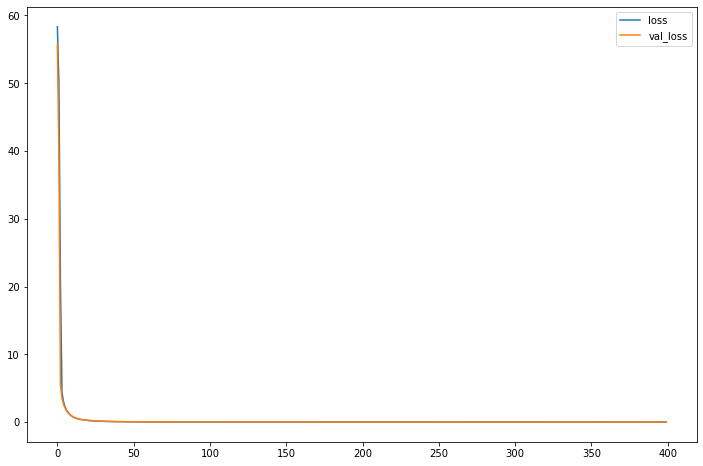

In [155]:
loss_df = pd.DataFrame(model_1.history.history)
loss_df.plot(figsize=(12,8))

In [164]:
model_2 = Sequential()

model_2.add(Dense(12,activation='relu'))
model_2.add(Dense(12,activation='relu'))
model_2.add(Dense(12,activation='relu'))
model_2.add(Dense(12,activation='relu'))
model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [165]:
model_2.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=150)

Epoch 1/150
48/48 [==============================] - 1s 8ms/step - loss: 54.1910 - val_loss: 45.7252
Epoch 2/150
48/48 [==============================] - 0s 2ms/step - loss: 29.7761 - val_loss: 11.5030
Epoch 3/150
48/48 [==============================] - 0s 3ms/step - loss: 7.2073 - val_loss: 4.9829
Epoch 4/150
48/48 [==============================] - 0s 3ms/step - loss: 3.7873 - val_loss: 2.9381
Epoch 5/150
48/48 [==============================] - 0s 2ms/step - loss: 2.4123 - val_loss: 1.9651
Epoch 6/150
48/48 [==============================] - 0s 2ms/step - loss: 1.6952 - val_loss: 1.3977
Epoch 7/150
48/48 [==============================] - 0s 2ms/step - loss: 1.2404 - val_loss: 1.0347
Epoch 8/150
48/48 [==============================] - 0s 3ms/step - loss: 0.9334 - val_loss: 0.7954
Epoch 9/150
48/48 [==============================] - 0s 2ms/step - loss: 0.7203 - val_loss: 0.6343
Epoch 10/150
48/48 [==============================] - 0s 2ms/step - loss: 0.5742 - val_loss: 0.5226
Epoch

<AxesSubplot:>

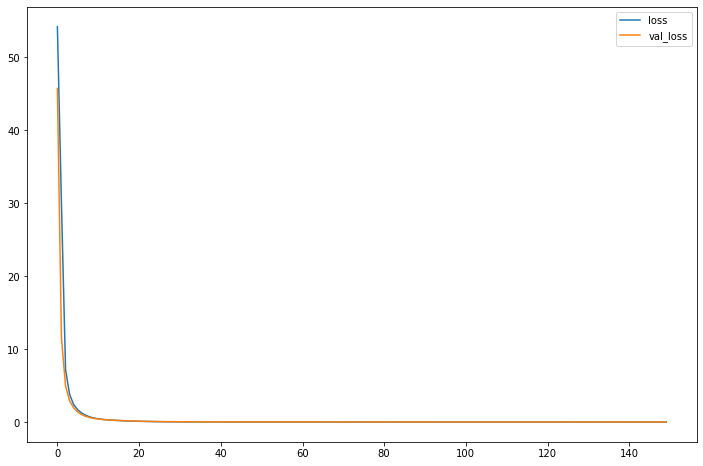

In [166]:
loss_df = pd.DataFrame(model_2.history.history)
loss_df.plot(figsize=(12,8))

In [168]:
y_pred_1 = model.predict(X_val)

In [177]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_val, y_pred_1)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_val, y_pred_1)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_pred_1))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_val,y_pred_1)))

Mean Absolute Error: 0.11
Mean Squared Error: 0.04
Root Mean Squared Error: 0.20
Variance score is: 0.83


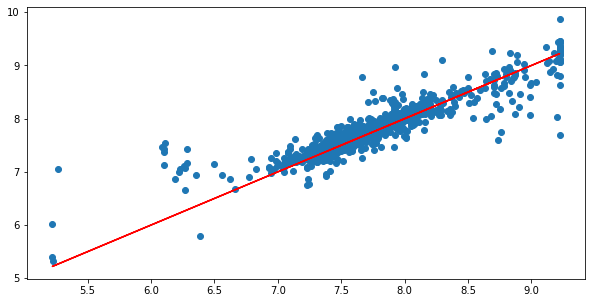

In [179]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_val,y_pred_1)
# Perfect predictions
plt.plot(y_val,y_val,'r')

<AxesSubplot:xlabel='target', ylabel='Density'>

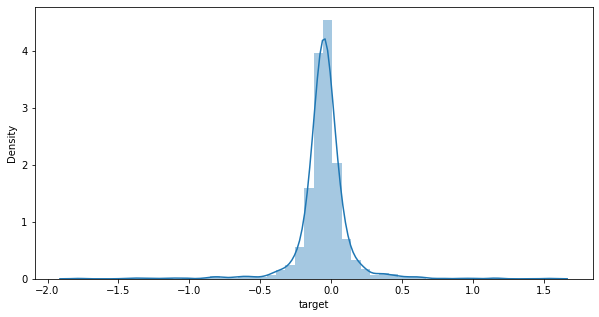

In [180]:
fig = plt.figure(figsize=(10,5))
residuals = (y_val - y_pred_1[:,0])
sns.distplot(residuals)

In [182]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_val, y_pred_1)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_val, y_pred_1)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_pred_1))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_val,y_pred_1)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_val, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_val, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_val,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 0.11
Mean Squared Error(MSE): 0.04
Root Mean Squared Error(RMSE): 0.20
Variance score: 83.15

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 0.13
Mean Squared Error(MSE):0.05
Root Mean Squared Error(RMSE):0.23
Variance score: 74.62


### Another Try

In [180]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6067, 11) (1517, 11) (6067,) (1517,)


In [173]:
from keras.models import Sequential
from keras.layers import Dense

In [190]:
model_3 = Sequential([
    Dense(32, activation='relu', input_shape=(12,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='relu'),
])

In [191]:
model_3.compile(optimizer='adam',
              loss='mse')

In [192]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [193]:
hist = model_3.fit(x=X_train,y=y_train,
          batch_size=128, epochs=150,
          validation_data=(X_val,y_val))

Epoch 1/150
48/48 [==============================] - 2s 16ms/step - loss: 40.5796 - val_loss: 13.1085
Epoch 2/150
48/48 [==============================] - 0s 3ms/step - loss: 4.7481 - val_loss: 2.6744
Epoch 3/150
48/48 [==============================] - 0s 3ms/step - loss: 2.0634 - val_loss: 1.8590
Epoch 4/150
48/48 [==============================] - 0s 3ms/step - loss: 1.5241 - val_loss: 1.4918
Epoch 5/150
48/48 [==============================] - 0s 3ms/step - loss: 1.2310 - val_loss: 1.2310
Epoch 6/150
48/48 [==============================] - 0s 3ms/step - loss: 1.0207 - val_loss: 1.0381
Epoch 7/150
48/48 [==============================] - 0s 3ms/step - loss: 0.8639 - val_loss: 0.8892
Epoch 8/150
48/48 [==============================] - 0s 3ms/step - loss: 0.7372 - val_loss: 0.7620
Epoch 9/150
48/48 [==============================] - 0s 3ms/step - loss: 0.6359 - val_loss: 0.6607
Epoch 10/150
48/48 [==============================] - 0s 3ms/step - loss: 0.5468 - val_loss: 0.5691
Epoch 

In [194]:
model_3.evaluate(X_val, y_val)

48/48 [==============================] - 0s 1ms/step - loss: 0.0434


0.043362561613321304

## Visualizing Loss and Accuracy

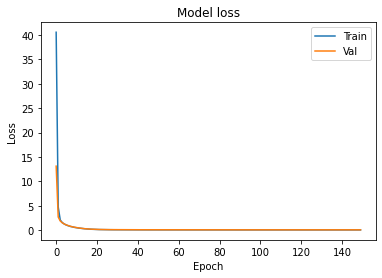

In [195]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [196]:
from keras.layers import Dropout
from keras import regularizers

In [201]:
model_4 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(12,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_4.compile(optimizer='adam',
              loss='mse')
hist_2 = model_4.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
190/190 [==============================] - 16s 74ms/step - loss: 18.6008 - val_loss: 9.3965
Epoch 2/100
  2/190 [..............................] - ETA: 10s - loss: 9.6897

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

### Ensembling & Stacking models

In [14]:
# Import libraries

from sklearn.model_selection import GridSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge

from mlxtend.regressor import StackingRegressor
from xgboost import XGBRegressor

# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

In [100]:
y = train.target
train.drop(['Date','target'], axis = 1, inplace = True)
X = train.iloc[:,:].values

# split into train test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [101]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6067, 11) (1517, 11) (6067,) (1517,)


### Feature Scaling

In [103]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
#X_train = RobustScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train )

X_val = scaler.transform(X_val)
X_val = pd.DataFrame(X_val)
#X_test = RobustScaler().fit_transform(X_test)

### Simple Modeling

We will be evaluating below algorithms' root-mean-squared-error for train dataset.

- Ridge Regression
- Lasso Regression
- ElasticNet Regression
- Support Vector Machine
- Random Forest
- XG Boost

In [104]:
kfold = KFold(n_splits=20, random_state= 0, shuffle = True)

In [106]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

In [107]:
KR = KernelRidge()

KR_param_grid = {
    'alpha' : [0.93],
    'kernel' : ['polynomial'],
    'gamma':[0.001],
    'degree': [3],
    'coef0': [1.5]
}

KR_CV = GridSearchCV(KR, param_grid = KR_param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1, verbose = 1)
KR_CV.fit(X_train, y_train)
KR_best = KR_CV.best_estimator_
print(KR_best)

# scaler, cv = 20
# * KernelRidge(alpha=1.0, coef0=0.9, degree=2, gamma=0.004, kernel='polynomial',kernel_params=None)
# ** KernelRidge(alpha=0.93, coef0=1.5, degree=3, gamma=0.001, kernel='polynomial',kernel_params=None)
# *** KernelRidge(alpha=0.93, coef0=1.5, degree=3, gamma=0.001, kernel='polynomial',kernel_params=None) - 0.12514

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min finished


KernelRidge(alpha=0.93, coef0=1.5, gamma=0.001, kernel='polynomial')


In [109]:
y_submission_1 = np.expm1(KR_best.predict(X_val))

In [110]:
score = rmsle_cv(KR_best)
print("Kernel Ridge mean score:", score.mean())
print("Kernel Ridge std:", score.std())

Kernel Ridge mean score: 632.920122184529
Kernel Ridge std: 125.0393750584859


In [111]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2], random_state = 1, n_jobs = -1, verbose = 1)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Optimized Alpha:", alpha)

lasso = LassoCV(alphas = alpha * np.linspace(0.5,1.5,20), cv = kfold, random_state = 1, n_jobs = -1)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Final Alpha:", alpha)

# scaler cv = 20
#lasso = LassoCV(alphas = 0.00244736842105, cv = kfold, random_state = 1, n_jobs = -1, verbose = 1)
#lasso.fit(X_train, y_df)

#Final Alpha: 0.00244736842105

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
...............................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


Optimized Alpha: 0.8
Final Alpha: 1.2000000000000002


In [112]:
print("Lasso mean score:", rmsle_cv(lasso).mean())
print("Lasso std:", rmsle_cv(lasso).std())

Lasso mean score: 639.9148595112732
Lasso std: 126.98796952753636


In [113]:
y_submission_2 = np.expm1(lasso.predict(X_val))

In [114]:
elnet = ElasticNetCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2] 
                ,l1_ratio = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
                ,cv = kfold, random_state = 1, n_jobs = -1)
elnet.fit(X_train, y_train)
alpha = elnet.alpha_
ratio = elnet.l1_ratio_
print("Optimized Alpha:", alpha)
print("Optimized l1_ratio:", ratio)

elnet = ElasticNetCV(alphas = alpha * np.linspace(0.5,1.5,20), l1_ratio = ratio * np.linspace(0.9,1.3,6), 
                     cv = kfold, random_state = 1, n_jobs = -1)
elnet.fit(X_train, y_train)

alpha = elnet.alpha_
ratio = elnet.l1_ratio_

print("Final Alpha:", alpha)
print("Final l1_ratio:", ratio)

# scaler cv = 20
# Final Alpha: 0.0276315789474, Final l1_ratio: 0.09

Optimized Alpha: 1.2
Optimized l1_ratio: 1.0
Final Alpha: 0.6
Final l1_ratio: 0.98


In [115]:
print("ElasticNet mean score:", rmsle_cv(elnet).mean())
print("ElasticNet std:", rmsle_cv(elnet).std())

ElasticNet mean score: 640.1577570231688
ElasticNet std: 126.0311331780859


In [116]:
y_submission_3 = np.expm1(elnet.predict(X_val))
# kaggle_score: 0.12302

In [118]:
epsilons = [0.03]
degrees = [2]
coef0s = [1.6]

gammas = ['auto']
Cs = [0.1]
kernels = ['poly']

param_grid = dict(C=Cs, epsilon = epsilons, gamma=gammas, kernel=kernels, degree= degrees, coef0=coef0s)
SVMR = GridSearchCV(SVR(), param_grid = param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1,verbose = 1)

SVMR.fit(X_train,y_train)
SVMR_best = SVMR.best_estimator_
print(SVMR.best_params_)

# cv = 20 

# * {'kernel': 'poly', 'C': 0.1, 'gamma': 'auto', 'degree': 2, 'epsilon': 0.03, 'coef0': 1.5} - 0.12514
# ** {'kernel': 'poly', 'C': 0.1, 'gamma': 'auto', 'degree': 2, 'epsilon': 0.03, 'coef0': 1.6} - 0.12428

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.9s finished


{'C': 0.1, 'coef0': 1.6, 'degree': 2, 'epsilon': 0.03, 'gamma': 'auto', 'kernel': 'poly'}


In [119]:
print("SVM mean score:", rmsle_cv(SVMR_best).mean())
print("SVM std:", rmsle_cv(SVMR_best).std())

SVM mean score: 1336.6072092233373
SVM std: 217.8731748457981


In [120]:
y_submission_4 = np.expm1(SVMR.predict(X_val))

In [122]:
RFC = RandomForestRegressor(random_state = 1)

rf_param_grid = {"max_depth": [None],
              "max_features": [11],
              "min_samples_leaf": [1],
              "n_estimators" :[570]
                }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv = kfold, scoring = "neg_mean_squared_error", n_jobs = -1, verbose = 1)
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_params_)


# cv = 20 (Scaler)
# {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 88, 'n_estimators': 600}
# {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 88, 'n_estimators': 570} - 0.13778

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.7min finished


{'max_depth': None, 'max_features': 11, 'min_samples_leaf': 1, 'n_estimators': 570}


In [123]:
print("Random Forest mean score:", rmsle_cv(RFC_best).mean())
print("Random Forest std:", rmsle_cv(RFC_best).std())

Random Forest mean score: 617.0214821931355
Random Forest std: 123.46611261491107


In [124]:
y_submission_5 = np.expm1(gsRFC.predict(X_val))

In [125]:
XGB = XGBRegressor()

xg_param_grid = {
              'n_estimators' :[870],
              'learning_rate': [0.04],
              
              'max_depth': [3],
              'min_child_weight':[0.2],
              
              'gamma': [0],
                
              'subsample':[0.8],
              'colsample_bytree':[0.7]
    
              #'reg_alpha':[0.08,0.09,0.095,0.1,0.15,0.2],
              #'reg_lambda':[0,0.001,0.002]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_train)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)

# cv = 20
# {'min_child_weight': 0.5, 'learning_rate': 0.05, 'n_estimators': 850, 'max_depth': 3} - 0.12611
# {'min_child_weight': 0.2, 'learning_rate': 0.04, 'gamma': 0, 'n_estimators': 870, 'max_depth': 3}
# * {'max_depth': 3, 'subsample': 0.8, 'learning_rate': 0.04, 'gamma': 0, 'colsample_bytree': 0.7, 'min_child_weight': 0.2, 'n_estimators': 870} - 0.12287
# {'gamma': 0, 'min_child_weight': 0.1, 'learning_rate': 0.04, 'n_estimators': 885, 'max_depth': 3}

# {'reg_alpha': 0.1, 'reg_lambda': 0.001, 'n_estimators': 870, 'colsample_bytree': 0.7, 'subsample': 0.8, 'min_child_weight': 0.2, 'learning_rate': 0.04, 'gamma': 0, 'max_depth': 3} - 0.12531
# 

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 0.2, 'n_estimators': 870, 'subsample': 0.8}


In [126]:
print("XG Boost mean score:", rmsle_cv(XGB_best).mean())
print("XG Boost std:", rmsle_cv(XGB_best).std())

XG Boost mean score: 617.7618098901669
XG Boost std: 119.15017402464021


In [127]:
y_submission_6 = np.expm1(gsXGB.predict(X_val))

In [128]:
XGB = XGBRegressor()

ELNET = ElasticNet(random_state = 1)
LCV=Lasso(random_state = 1)
SV = SVR()
KR = KernelRidge()
XG = XGBRegressor()
stack = StackingRegressor(regressors = [ELNET,LCV,XG],meta_regressor = XGB)

params = {       
              'meta-xgbregressor__n_estimators' : [740*2],#740
              'meta-xgbregressor__learning_rate': [0.01/2], #0.01
              'meta-xgbregressor__min_child_weight':[0],
              'meta-xgbregressor__gamma':[0.1],
              'meta-xgbregressor__max_depth': [2],
              'meta-xgbregressor__subsample':[0.65],
              'meta-xgbregressor__colsample_bytree':[0.4],
              'meta-xgbregressor__reg_alpha':[0],
              'meta-xgbregressor__reg_lambda':[1],
              
              'lasso__alpha':[0.00244736842105],
              'elasticnet__alpha':[0.0276315789474],
              'elasticnet__l1_ratio':[0.09],
              'xgbregressor__min_child_weight':[0.2],
              'xgbregressor__n_estimators' : [870],
              'xgbregressor__learning_rate': [0.04],
              'xgbregressor__gamma':[0],
              'xgbregressor__max_depth': [3],
              'xgbregressor__subsample':[0.8],
              'xgbregressor__colsample_bytree':[0.7]
    
              #'kernelridge__alpha':[0.93],
              #'kernelridge__coef0':[1.5],
              #'kernelridge__degree':[3],
              #'kernelridge__gamma':[0.001],
              #'kernelridge__kernel':['polynomial'],
              #'kernelridge__kernel_params':[None],
              
              #'svr__coef0':[1.6],
              #'svr__kernel':['poly'],
              #'svr__epsilon':[0.03],
              #'svr__gamma': ['auto'],
              #'svr__degree': [2],
              #'svr__C':[0.1]
        }

grid = GridSearchCV(estimator = stack, param_grid=params,cv=kfold,refit=True, verbose=1,n_jobs=1,scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)
grid_best = grid.best_estimator_
print(grid_best)

#StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
#learning_rate=0.01, max_delta_step=0, max_depth=3,
#min_child_weight=0.5, missing=None, n_estimators=770, nthread=-1,
#objective='reg:linear', reg_alpha=0, reg_lambda=1,
#scale_pos_weight=1, seed=0, silent=True, subsample=1) - 0.12965

# StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
# gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=1,
# min_child_weight=0.3, missing=None, n_estimators=760, nthread=-1,
# objective='reg:linear', reg_alpha=0, reg_lambda=1,
# scale_pos_weight=1, seed=0, silent=True, subsample=0.3) - 0.12546

#StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
#gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=1,
#min_child_weight=0.2, missing=None, n_estimators=760, nthread=-1,
#objective='reg:linear', reg_alpha=0, reg_lambda=1,
#scale_pos_weight=1, seed=0, silent=True, subsample=0.2) - 0.12493

#StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
#gamma=0.1, learning_rate=0.01, max_delta_step=0, max_depth=2,
#min_child_weight=0, missing=None, n_estimators=740, nthread=-1,
#objective='reg:linear', reg_alpha=0, reg_lambda=1,
#scale_pos_weight=1, seed=0, silent=True, subsample=0.65) - 0.12027

#StackingRegressor(meta_regressor=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
#gamma=0.1, learning_rate=0.005, max_delta_step=0, max_depth=2,
#min_child_weight=0, missing=None, n_estimators=1480, nthread=-1,
#objective='reg:linear', reg_alpha=0, reg_lambda=1,
#scale_pos_weight=1, seed=0, silent=True, subsample=0.65) - 0.12026

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter meta-xgbregressor for estimator StackingRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_...
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None)]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print("Stacking mean score:", rmsle_cv(grid_best).mean())
print("Stacking std:", rmsle_cv(grid_best).std())

In [ ]:
y_submission_st = np.expm1(grid.predict(X_val))

### Ensemble Techniques

#### Max Voting / Voting Classifier

In [3]:
train.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75


In [31]:
X = train.iloc[:, 1:11] 
Y = train.target.astype(int)

In [38]:
Y

0       2475
1       2484
2       2486
3       2533
4       2850
        ... 
7579    1453
7580    1463
7581    1937
7582    1924
7583    1501
Name: target, Length: 7584, dtype: int32

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20) 

In [33]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

In [34]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test)   

In [36]:
# accuracy_score metric to predict Accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

Hard Voting Score  0


In [39]:
y_test

2594     1723
4733     2100
3185      528
1334    10117
2303     1708
        ...  
2675     1685
5061     2336
1195     3696
1509     4316
3142     3132
Name: target, Length: 1517, dtype: int32

In [40]:
y_pred

array([1625, 2041, 1212, ..., 2661, 3713, 2360])

In [41]:
# Voting Classifier with soft voting 
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(X_train, y_train) 
y_pred = soft_voting.predict(X_test) 

In [42]:
# Using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 

Soft Voting Score  0


###  Averaging

In [44]:
# Import libraries
import pandas as pd # for data analsysis
import numpy as np # to handle data in a vectorized manner
import seaborn as sns # for visualization
from sklearn.model_selection import RandomizedSearchCV # for hyperparameters tuning
from sklearn.model_selection import cross_val_score # for cross-validation evaluation
from sklearn.metrics import mean_squared_error # to calculate the RMSE
from joblib import dump # to save a model to disk

In [48]:
train = pd.read_excel('Training Set.xlsx')
test = pd.read_excel("Test Set.xlsx")

In [49]:
y = train['target']
y

0       2475.68
1       2484.40
2       2486.89
3       2533.42
4       2850.75
         ...   
7579    1453.59
7580    1463.07
7581    1937.00
7582    1924.55
7583    1501.96
Name: target, Length: 7584, dtype: float64

In [50]:
X = train.drop(columns={'target', 'Date'})
X

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price
0,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524
1,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393
2,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833
3,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119
4,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119
...,...,...,...,...,...,...,...,...,...,...,...
7579,20,4,5,1470.69,1886.14,1892.6,-23.4,1624.207917,1584.67,1303.85,1442.281607
7580,21,4,5,1453.59,1358.54,1850.3,-42.3,1618.746250,1599.34,1311.11,1443.172917
7581,22,4,5,1463.07,1772.66,1759.8,-90.5,1613.068333,1922.86,1368.03,1444.077440
7582,23,4,5,1937.00,1700.50,1668.2,-91.6,1613.657500,1719.45,1335.67,1447.464167


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train )
#X_train = RobustScaler().fit_transform(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
#X_test = RobustScaler().fit_transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Model evaluation by cross-validation
lin_reg_score = cross_val_score(lin_reg, X_train, y_train, verbose = 2)

# Average Coefficient of determination (R^2) on the validation set
print(f'R^2 Validation: {lin_reg_score.mean()}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
R^2 Validation: 0.8482662263291895


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [55]:
# Fit the model to the training set
lin_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
# Compute predictions from the test set
y_pred = lin_reg.predict(X_test)

In [57]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {lin_reg.score(X_test, y_test)}')

R^2 Test: -7534137.8228907


In [58]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 4479842.436651721


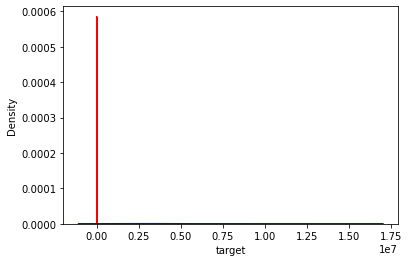

In [59]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("lin_reg.png")

In [62]:
X_test

,0,1,2,3,4,5,6,7,8,9,10
0,10.0,6.0,5.0,1782.9852,1262.576667,1581.6,37.7,1752.008133,1527.34,1649.89,1746.972323
1,2.0,3.0,5.0,1924.1700,1874.720000,1275.6,-66.6,2092.809167,1901.26,4013.28,3418.098663
2,1.0,3.0,5.0,2674.9700,2490.320000,1515.5,-60.8,2297.681250,1800.65,1845.52,1991.019107
3,10.0,1.0,4.0,1714.8100,1808.220000,1463.9,85.4,2235.069167,1850.25,1850.25,2633.704680
4,23.0,1.0,4.0,1861.7100,1564.880000,1365.0,-66.1,1380.515000,1265.73,1265.73,2721.466902
...,...,...,...,...,...,...,...,...,...,...,...
1512,6.0,7.0,2.0,1966.4500,1497.030000,1296.1,-3.0,1897.783750,1696.96,1696.96,1756.665417
1513,1.0,2.0,6.0,1786.9000,1625.610000,1478.9,-74.4,1656.453750,1646.75,1646.75,1847.528631
1514,2.0,3.0,5.0,1862.8800,1681.530000,1325.0,-45.1,1652.692083,1932.18,1997.52,1756.039970
1515,3.0,1.0,4.0,1930.0300,1661.030000,1385.7,-42.5,1927.730625,1964.03,1964.03,1729.097173


In [63]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2
poly_features = PolynomialFeatures(degree = 2)

# Returns a transformed version of X with new combinations of features
X_train_scaled_poly = poly_features.fit_transform(X_train)
X_test_scaled_poly = poly_features.fit_transform(X_test)

In [64]:
poly_reg = LinearRegression()

# Model evaluation by cross-validation
poly_reg_score = cross_val_score(poly_reg, X_train_scaled_poly, y_train, verbose = 2)

# Average Coefficient of determination (R^2) on the validation set
print(f'R^2 Validation: {poly_reg_score.mean()}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
R^2 Validation: 0.8503066053299493


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [65]:
# Fit the model to the training set
poly_reg.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [66]:
# Compute predictions from the test set
y_pred = poly_reg.predict(X_test_scaled_poly)

In [67]:
y_pred

array([4.54125339e+08, 6.78102134e+08, 5.57050702e+08, ...,
       3.48727725e+08, 4.34107154e+08, 4.15800317e+08])

In [68]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {poly_reg.score(X_test_scaled_poly, y_test)}')

R^2 Test: -223929186644.81747


In [69]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 772327113.6934577


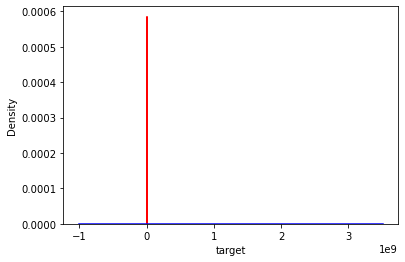

In [70]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

